Loading data...
Preprocessing data...
Generating visualizations...
Generated plot: accidents_by_hour.png
Generated plot: accidents_by_weather.png
Generated plot: accidents_by_road_condition.png
Generated plot: accidents_by_cause.png
Generated plot: accidents_by_day_of_week.png

Analysis complete. All plots have been saved.


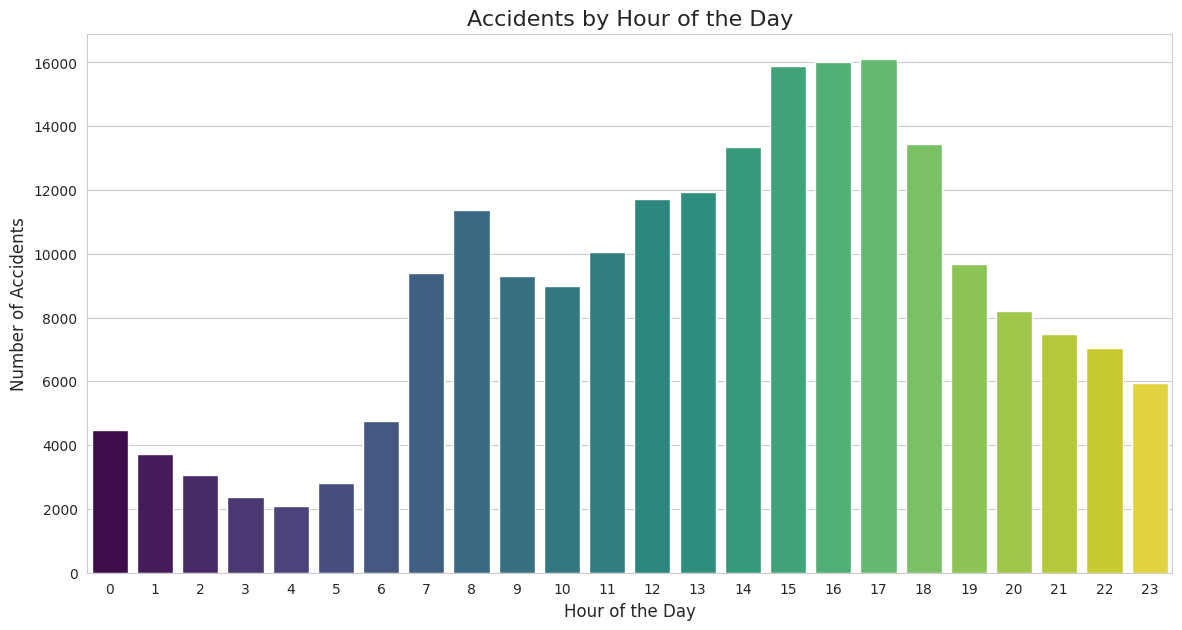

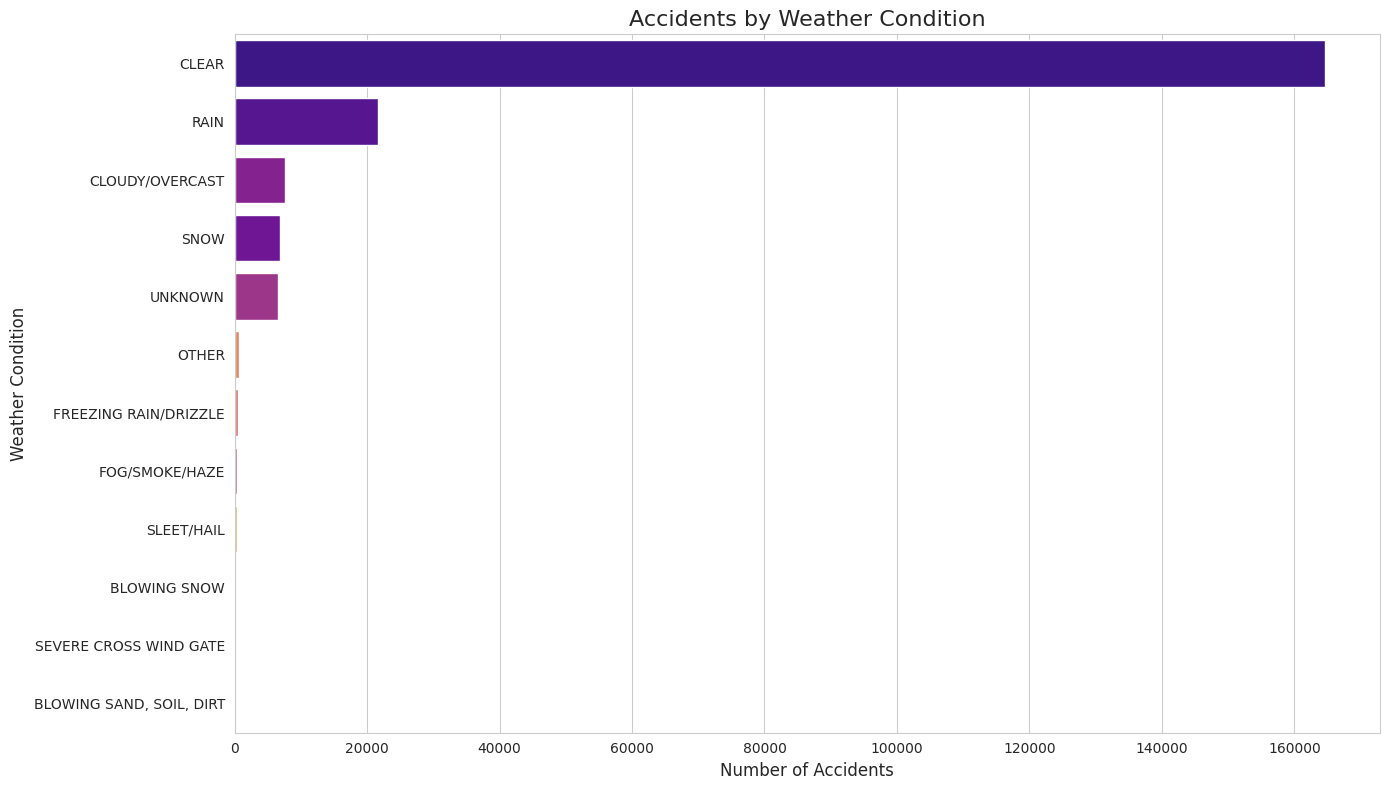

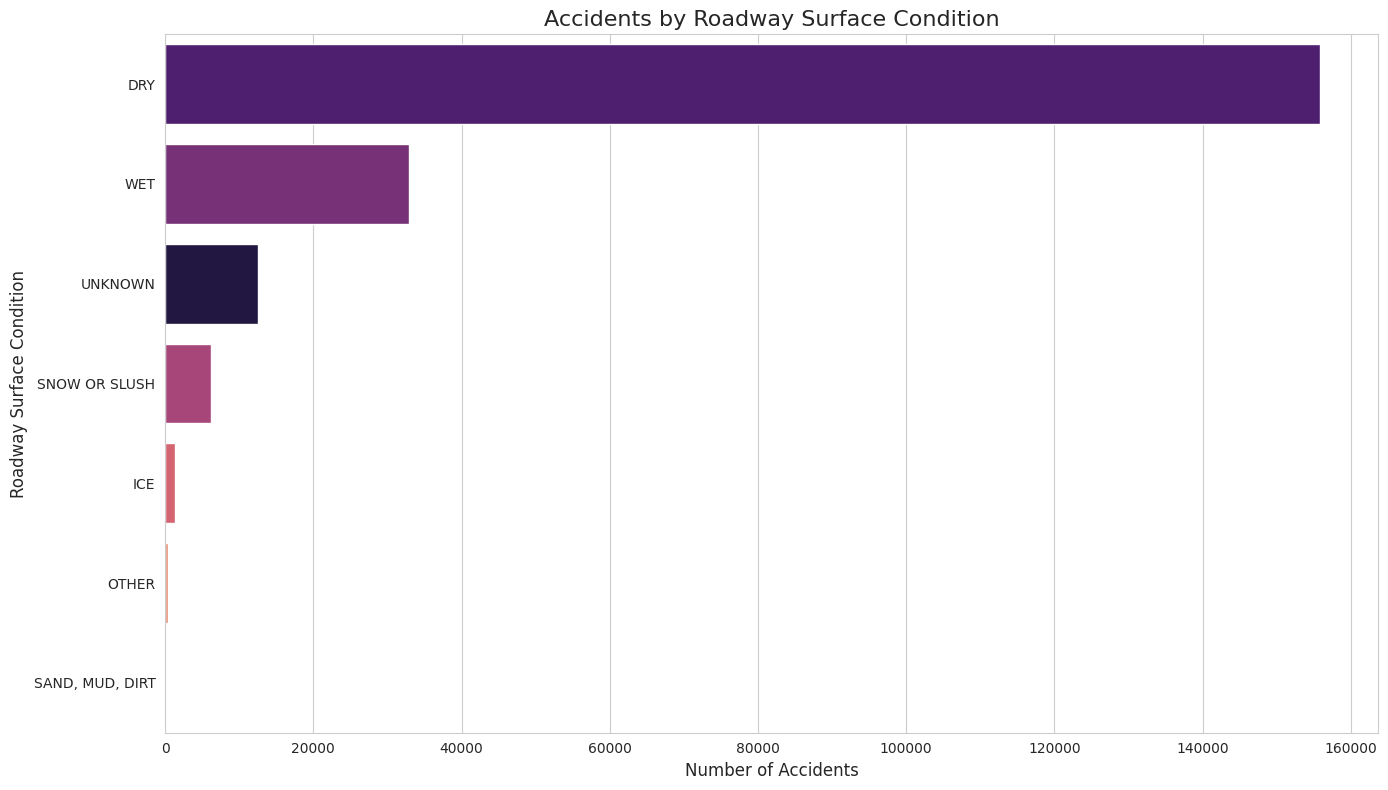

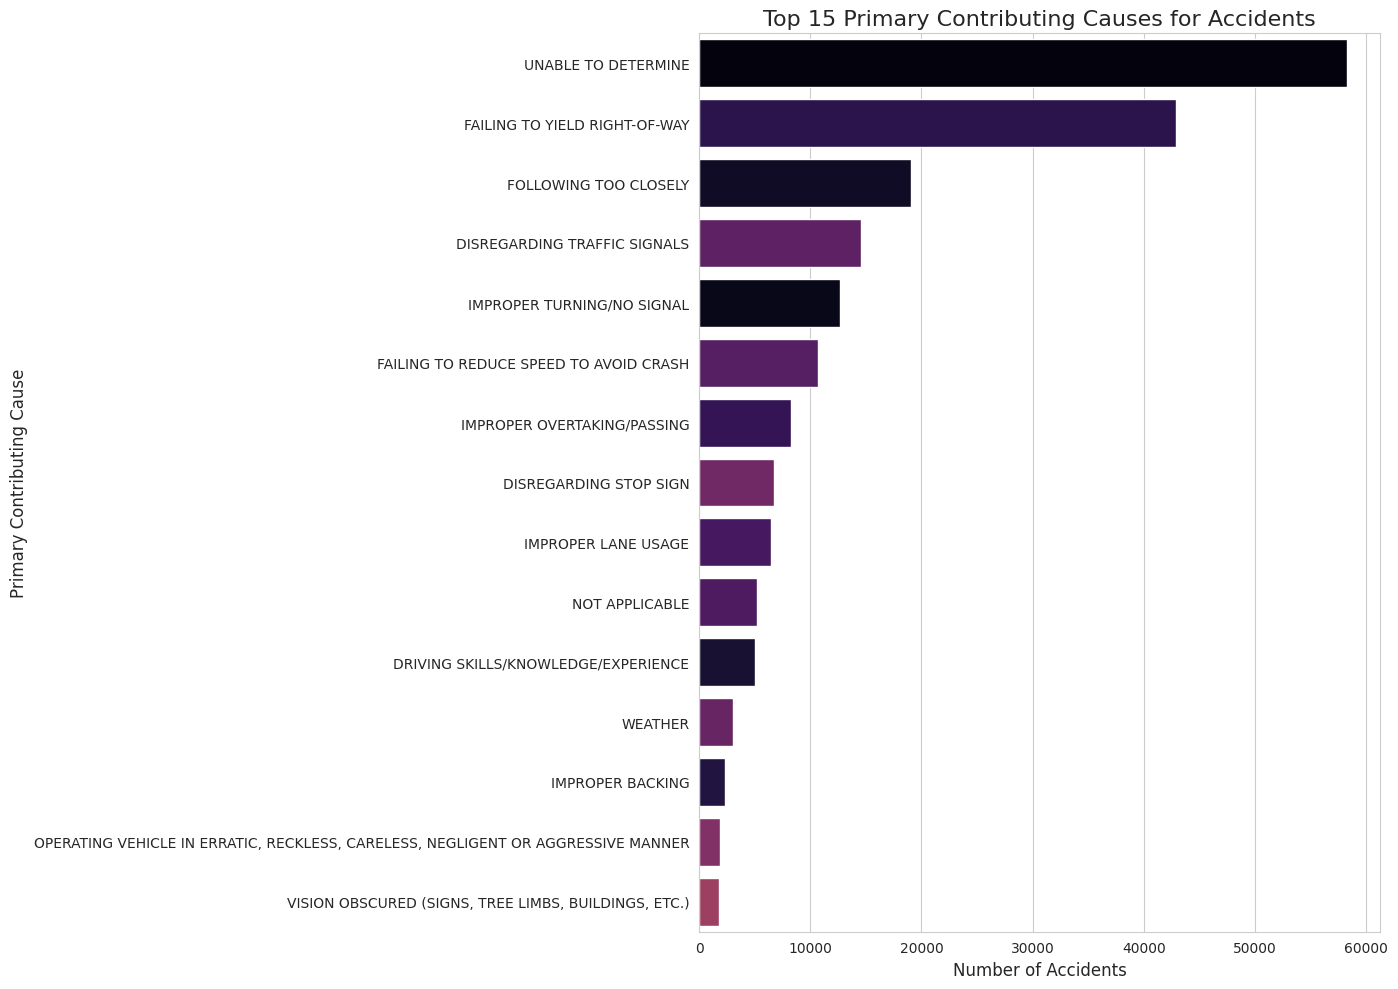

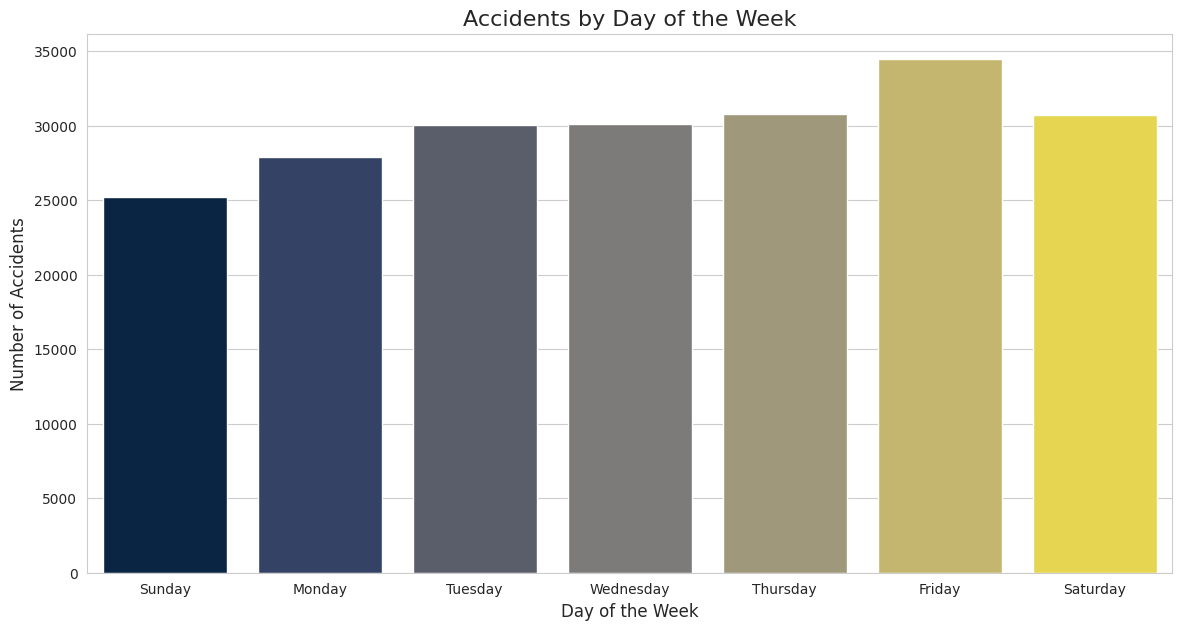

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_traffic_accidents(filepath):
    """
    Analyzes traffic accident data from a CSV file to identify patterns
    related to road conditions, weather, and time of day. It generates
    and saves visualizations of accident hotspots and contributing factors.

    Args:
        filepath (str): The path to the traffic accidents CSV file.
    """
    try:
        # --- 1. Data Loading ---
        print("Loading data...")
        df = pd.read_csv(filepath)

        # --- 2. Data Preprocessing ---
        print("Preprocessing data...")
        # FIX: Explicitly provide the date format to prevent UserWarning.
        date_format = '%m/%d/%Y %I:%M:%S %p'
        df['crash_date'] = pd.to_datetime(df['crash_date'], format=date_format)

        # --- 3. Analysis and Visualization ---
        print("Generating visualizations...")
        sns.set_style("whitegrid")

        # Plot 1: Accidents by Hour of the Day
        plt.figure(figsize=(14, 7))
        # FIX: Assign 'crash_hour' to hue to resolve FutureWarning.
        sns.countplot(x='crash_hour', data=df, hue='crash_hour', palette='viridis', legend=False)
        plt.title('Accidents by Hour of the Day', fontsize=16)
        plt.xlabel('Hour of the Day', fontsize=12)
        plt.ylabel('Number of Accidents', fontsize=12)
        plt.savefig('accidents_by_hour.png')
        print("Generated plot: accidents_by_hour.png")

        # Plot 2: Accidents by Weather Condition
        plt.figure(figsize=(14, 8))
        order = df['weather_condition'].value_counts().index
        # FIX: Assign 'weather_condition' to hue to resolve FutureWarning.
        sns.countplot(y='weather_condition', data=df, hue='weather_condition', palette='plasma', order=order, legend=False)
        plt.title('Accidents by Weather Condition', fontsize=16)
        plt.xlabel('Number of Accidents', fontsize=12)
        plt.ylabel('Weather Condition', fontsize=12)
        plt.tight_layout()
        plt.savefig('accidents_by_weather.png')
        print("Generated plot: accidents_by_weather.png")

        # Plot 3: Accidents by Roadway Surface Condition
        plt.figure(figsize=(14, 8))
        order = df['roadway_surface_cond'].value_counts().index
        # FIX: Assign 'roadway_surface_cond' to hue to resolve FutureWarning.
        sns.countplot(y='roadway_surface_cond', data=df, hue='roadway_surface_cond', palette='magma', order=order, legend=False)
        plt.title('Accidents by Roadway Surface Condition', fontsize=16)
        plt.xlabel('Number of Accidents', fontsize=12)
        plt.ylabel('Roadway Surface Condition', fontsize=12)
        plt.tight_layout()
        plt.savefig('accidents_by_road_condition.png')
        print("Generated plot: accidents_by_road_condition.png")

        # Plot 4: Top 15 Primary Contributing Causes for Accidents
        plt.figure(figsize=(14, 10))
        top_15_causes = df['prim_contributory_cause'].value_counts().nlargest(15)
        # FIX: Assign 'prim_contributory_cause' to hue to resolve FutureWarning.
        sns.countplot(y='prim_contributory_cause', data=df, hue='prim_contributory_cause', palette='inferno', order=top_15_causes.index, legend=False)
        plt.title('Top 15 Primary Contributing Causes for Accidents', fontsize=16)
        plt.xlabel('Number of Accidents', fontsize=12)
        plt.ylabel('Primary Contributing Cause', fontsize=12)
        plt.tight_layout()
        plt.savefig('accidents_by_cause.png')
        print("Generated plot: accidents_by_cause.png")

        # Plot 5: Accidents by Day of the Week
        plt.figure(figsize=(14, 7))
        day_order = [1, 2, 3, 4, 5, 6, 7]  # Sunday=1, ..., Saturday=7
        # FIX: Assign 'crash_day_of_week' to hue to resolve FutureWarning.
        sns.countplot(x='crash_day_of_week', data=df, hue='crash_day_of_week', palette='cividis', order=day_order, legend=False)
        plt.title('Accidents by Day of the Week', fontsize=16)
        plt.xlabel('Day of the Week', fontsize=12)
        plt.ylabel('Number of Accidents', fontsize=12)
        plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
        plt.savefig('accidents_by_day_of_week.png')
        print("Generated plot: accidents_by_day_of_week.png")

        print("\nAnalysis complete. All plots have been saved.")

    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == '__main__':
    DATA_FILE = 'traffic_accidents.csv'
    analyze_traffic_accidents(DATA_FILE)